# What is ML
it is the subdomain of Computer Science, using algorithms which help the computer to learn from date without explicit programming(process)

## AI
It is a area of Computer Science, where the goal machine be able  to perform human like tasks and simulate human behavior
## ML
it is a subset of AI tries to solve specific problem and make predictions using data with code and math
## Data Science

It is a field attempts to find patterns and draw insights from date(it might use ML)



# Types of ML
## Supervised Leaning
We use labeled input(meaning input has a corresponding output label is like when we know them the information name) to train models and learn outputs
--
### Features
- Qualitative: Categorical data(finite number of categories or groups)
  - No inherent order
  ##### Example:
  ###### We have different parts in the life baby, child, teen young adult, adult, old adult and very old adult, is has a order, baby is nearly to child than old adult to child.
#### Rules
- We enter inputs as data there and the machine return a output

  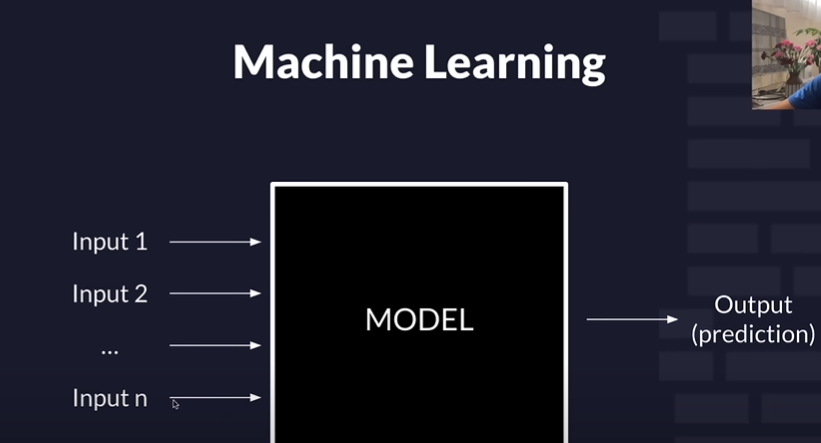
#### Example:
We have three photos, three animals like Dog, Cat and Horse, we says to machine what kind of animals are there, the way to say them, is with the label.
## Unsupervised Learning
Uses unlabeled data to learn about patterns in  data
#### Example:
We have three photos, the machine don't know kind of animal are them but it put in different groups, checking theirs characteristics looking for patterns some of them share those characteristics, and when we put new data, the machine put together the data sharing some patterns
## Reinforcement Learning
It learn in interactive environment on rewards and penalties
it learn by itself, is like with train it with mistakes and says to the machine his mistakes to be better in the next time
#### Example:
We show it a phono of a bird, the machine tries to guess what it is the machine says, it is a computer, we say NO, the machine says it is a farm and we say NO and the machine say it is a dog we say No and the machine say it is a bird, and We say YES sir , and the machine now know what is it.


In [ ]:
# We import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] # We put the names of these datasets columns
df =pd.read_csv("magic04.data", names= cols) # To read the dataset
df.head()

# Explication
the column class have names g and h
G represents gammas 
H represents hadrones 

We convert them to numbers 

In [6]:
# df["class"].unique() # It returns the values of the column class

## We need to convert them to numbers
df["class"] = (df["class"] =="g").astype(int)